# Example of the TCGA LUAD rna dataset

In [ ]:
# Download dataset from Xena database:  

# # Example below with TCGA LUAD cohort
# !mkdir -p data_files/tcga_luad/rna

# Change name specific to your dataset. This example obtains the pancancer normalized RNAseq data for the TCGA LUAD cohort.
# !curl -o data_files/tcga_luad/rna/HiSeqV2_PANCAN_LUAD.gz https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/TCGA.LUAD.sampleMap%2FHiSeqV2_PANCAN.gz
# !gunzip data_files/tcga_luad/rna/HiSeqV2_PANCAN_LUAD.gz

# # Download Hallmark genes
# !curl -L -o data_files/hallmarks_signatures.csv https://raw.githubusercontent.com/mahmoodlab/SurvPath/main/datasets_csv/metadata/hallmarks_signatures.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 39.0M  100 39.0M    0     0  10.6M      0  0:00:03  0:00:03 --:--:-- 10.6M


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read pan-cancer normalized RNA data from LUAD
df_raw = pd.read_csv('data_files/tcga_luad/rna/HiSeqV2_PANCAN_LUAD', delimiter='\t')


In [ ]:
folds = [0, 1, 2, 3, 4]
cases_from_folds  = []

# We have only the clinical data for patients with WSI and RNA data 
# We store the samples with all data modalities available in cases_to_keep
for i in folds:
    df2 = pd.read_csv(f'data_files/tcga_luad/splits/{i}/test.csv', delimiter=',')
    df3 = pd.read_csv(f'data_files/tcga_luad/splits/{i}/train.csv', delimiter=',')

    cases_to_keep = list(df2[df2.columns[0]].values.flatten())
    cases_splits3 =list(df3[df3.columns[0]].values.flatten())
    cases_to_keep.extend(cases_splits3)
    cases_from_folds.append(set(cases_to_keep))

assert all(s == cases_from_folds[0] for s in cases_from_folds), "Not all sets are the same"

In [22]:
print("Nr. of genes ", len(df_raw))
print("Nr. of patients: ", len(df_raw.T))
print("Nr. of patients with RNA, Clinical and WSI data: ", len(cases_from_folds[0]))

Nr. of genes  20530
Nr. of patients:  577
Nr. of patients with RNA, Clinical and WSI data:  412


In [23]:
# Samples are in the columns, genes in the rows
print(df_raw.columns.tolist())

['sample', 'TCGA-69-7978-01', 'TCGA-62-8399-01', 'TCGA-78-7539-01', 'TCGA-50-5931-11', 'TCGA-73-4658-01', 'TCGA-44-6775-01', 'TCGA-44-2655-01', 'TCGA-44-3398-01', 'TCGA-62-8397-01', 'TCGA-53-A4EZ-01', 'TCGA-50-7109-01', 'TCGA-38-6178-01', 'TCGA-86-8056-01', 'TCGA-55-1592-01', 'TCGA-86-A4JF-01', 'TCGA-69-7974-01', 'TCGA-86-A456-01', 'TCGA-49-4512-11', 'TCGA-97-8547-01', 'TCGA-55-1595-01', 'TCGA-49-6743-11', 'TCGA-NJ-A4YP-01', 'TCGA-05-4424-01', 'TCGA-97-A4M7-01', 'TCGA-44-2668-01', 'TCGA-NJ-A55A-01', 'TCGA-44-6148-11', 'TCGA-50-5939-11', 'TCGA-05-5420-01', 'TCGA-55-1594-01', 'TCGA-44-2659-01', 'TCGA-78-7162-01', 'TCGA-38-4632-01', 'TCGA-49-6761-01', 'TCGA-91-6828-01', 'TCGA-05-4418-01', 'TCGA-99-AA5R-01', 'TCGA-55-7903-01', 'TCGA-55-A492-01', 'TCGA-55-8616-01', 'TCGA-86-7954-01', 'TCGA-05-4433-01', 'TCGA-69-8253-01', 'TCGA-86-8674-01', 'TCGA-69-7765-01', 'TCGA-86-8672-01', 'TCGA-MP-A4T6-01', 'TCGA-97-7547-01', 'TCGA-55-7911-01', 'TCGA-91-6835-01', 'TCGA-55-6984-11', 'TCGA-44-2657-11', '

In [24]:
# We transpose to have samples in rows and genes in columns
df_raw_T = df_raw
df_raw_T = df_raw_T.set_index('sample')
df_raw_T = df_raw_T.transpose()
df_raw_T = df_raw_T.sort_index(axis=0)
df_raw_T.index.name = None
df_raw_T = df_raw_T.reset_index()
df_raw_T.columns.name = None
print(df_raw_T)

               index  ARHGEF10L     HIF3A     RNF17     RNF10     RNF11  \
0    TCGA-05-4244-01  -0.056592  2.128674 -0.531035 -0.185972 -0.190878   
1    TCGA-05-4249-01  -0.569692 -0.318126 -0.531035  0.237428  0.011822   
2    TCGA-05-4250-01  -0.899992 -0.918126 -0.531035 -0.621472 -0.454178   
3    TCGA-05-4382-01   0.667508  3.895974 -0.221535 -0.367272  0.131822   
4    TCGA-05-4384-01  -0.316892  2.380374  0.156865  0.232828  0.054822   
..               ...        ...       ...       ...       ...       ...   
571  TCGA-NJ-A55O-01  -0.297392  1.831374 -0.531035 -0.098672 -0.553178   
572  TCGA-NJ-A55R-01   1.540708  2.921574  0.252165  0.489128 -0.382578   
573  TCGA-NJ-A7XG-01   0.054408  3.583174 -0.531035 -0.024172 -0.589278   
574  TCGA-O1-A52J-01  -0.202892  1.189674 -0.531035  0.393428 -0.831078   
575  TCGA-S2-AA1A-01   0.274608  0.556774  0.677065 -0.237372 -0.320778   

       RNF13   GTF2IP1      REM1     MTVR2  ...     TULP2     NPY5R     GNGT2  \
0   -0.11891 -0.65

In [27]:
# Put in correct format for our model
df_raw_T = df_raw_T.rename(columns={'index': 'sample'})

# Drop the samples extracted from the normal tissue
df_filtered = df_raw_T[~df_raw_T['sample'].str.endswith('-11')].reset_index(drop=True)

# Keep only the samples extracted from the primary tissue
df_filtered['sample'] = df_filtered['sample'].str.replace(r'-01', '', regex=True)

# Keep only the samples from the splits files; samples used in training
df_filtered_complete = df_filtered[df_filtered['sample'].isin(cases_to_keep)].reset_index(drop=True)

# Put in correct format for our model
df_filtered_complete = df_filtered_complete.rename(columns={'sample': 'Unnamed: 0'})

print(df_filtered_complete)

       Unnamed: 0  ARHGEF10L     HIF3A     RNF17     RNF10     RNF11    RNF13  \
0    TCGA-05-4249  -0.569692 -0.318126 -0.531035  0.237428  0.011822 -0.00611   
1    TCGA-05-4382   0.667508  3.895974 -0.221535 -0.367272  0.131822  0.97629   
2    TCGA-05-4398   0.293008 -1.676826 -0.247135  0.085028 -0.269378 -0.10971   
3    TCGA-05-4402   0.201408  1.425074  0.036965  0.515628  0.817822 -0.16901   
4    TCGA-05-4403  -0.310692 -0.361526 -0.531035 -0.046072  0.297422  0.69679   
..            ...        ...       ...       ...       ...       ...      ...   
407  TCGA-NJ-A55O  -0.297392  1.831374 -0.531035 -0.098672 -0.553178 -0.06021   
408  TCGA-NJ-A55R   1.540708  2.921574  0.252165  0.489128 -0.382578 -0.50921   
409  TCGA-NJ-A7XG   0.054408  3.583174 -0.531035 -0.024172 -0.589278 -0.93751   
410  TCGA-O1-A52J  -0.202892  1.189674 -0.531035  0.393428 -0.831078 -0.18691   
411  TCGA-S2-AA1A   0.274608  0.556774  0.677065 -0.237372 -0.320778  0.09349   

      GTF2IP1      REM1    

# Make Plots

In [28]:
#Boxplot per sample
def plot_box_per_sample(df_downloaded, top):
    # Transpose to have genes in rows and samples in columns
    df_downloaded_per_sample = df_downloaded.head(top).T.drop("Unnamed: 0", axis=0)
    # print("Data information")
    # print("Mean: ", df_downloaded_per_sample.mean(axis=0))
    # print("Std: ", df_downloaded_per_sample.std(axis=0))

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_downloaded_per_sample)
    plt.title("Distribution of Expression Values per Sample")
    plt.xlabel("Samples")
    plt.ylabel("Expression Value")
    plt.xticks(rotation=45)
    plt.show()

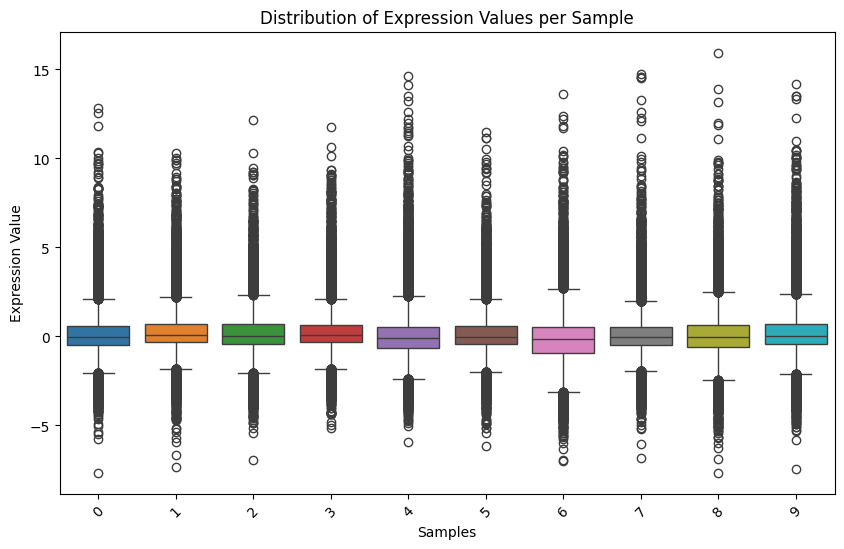

In [ ]:
top = 10
plot_box_per_sample(df_filtered_complete, top)

In [30]:
#Boxplot per gene
def plot_box_per_gene(df_downloaded, first, last):

    # Transpose to have genes in rows and samples in columns
    df_downloaded_per_gene = df_downloaded.iloc[:, first:last]

    # print("Data information")
    # print("Mean: ", df_downloaded_per_gene.mean(axis=0))
    # print("Std: ", df_downloaded_per_gene.std(axis=0))

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_downloaded_per_gene)
    plt.title("Distribution of Expression Values per Gene")
    plt.xlabel("Samples")
    plt.ylabel("Expression Value")
    plt.xticks(rotation=45)
    plt.show()

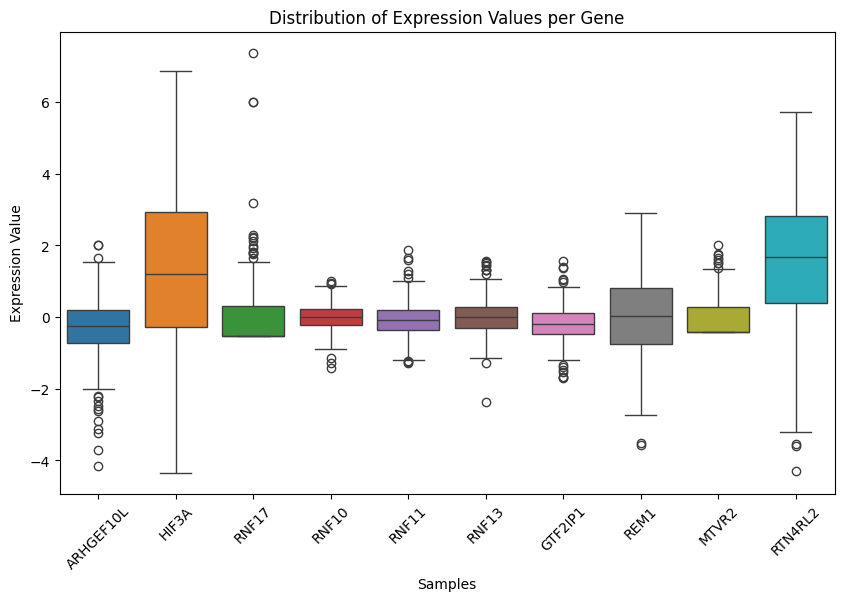

In [31]:
first = 1
last = 11
plot_box_per_gene(df_filtered_complete, first, last)

# Save dataset for training

In [ ]:
name_file = 'test_rna_data'
df_filtered_complete.to_csv(f'data_files/tcga_luad/rna/{name_file}.csv')